In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
import pathlib
data_dir = "/kaggle/input/cricket-shot-dataset/data/"
data_dir = pathlib.Path(data_dir) 
data_dir

PosixPath('/kaggle/input/cricket-shot-dataset/data')

In [3]:
list(data_dir.glob("*/*"))[:5]

[PosixPath('/kaggle/input/cricket-shot-dataset/data/pullshot/pullshot143.png'),
 PosixPath('/kaggle/input/cricket-shot-dataset/data/pullshot/pullshot29.png'),
 PosixPath('/kaggle/input/cricket-shot-dataset/data/pullshot/pullshot726.png'),
 PosixPath('/kaggle/input/cricket-shot-dataset/data/pullshot/pullshot412.png'),
 PosixPath('/kaggle/input/cricket-shot-dataset/data/pullshot/pullshot1250.png')]

In [4]:
image_count = len(list(data_dir.glob('*/*')))
image_count

4724

In [5]:
shot_img_dict = {
    'drive' : list(data_dir.glob('drive/*')),
    'legglance-flick' : list(data_dir.glob('legglance-flick/*')),
    'pullshot' : list(data_dir.glob('pullshot/*')),
    'sweep' : list(data_dir.glob('sweep/*'))
}

In [6]:
shot_label_dict ={
    'drive':0,
    'legglance-flick':1,
    'pullshot':2,
    'sweep':3}

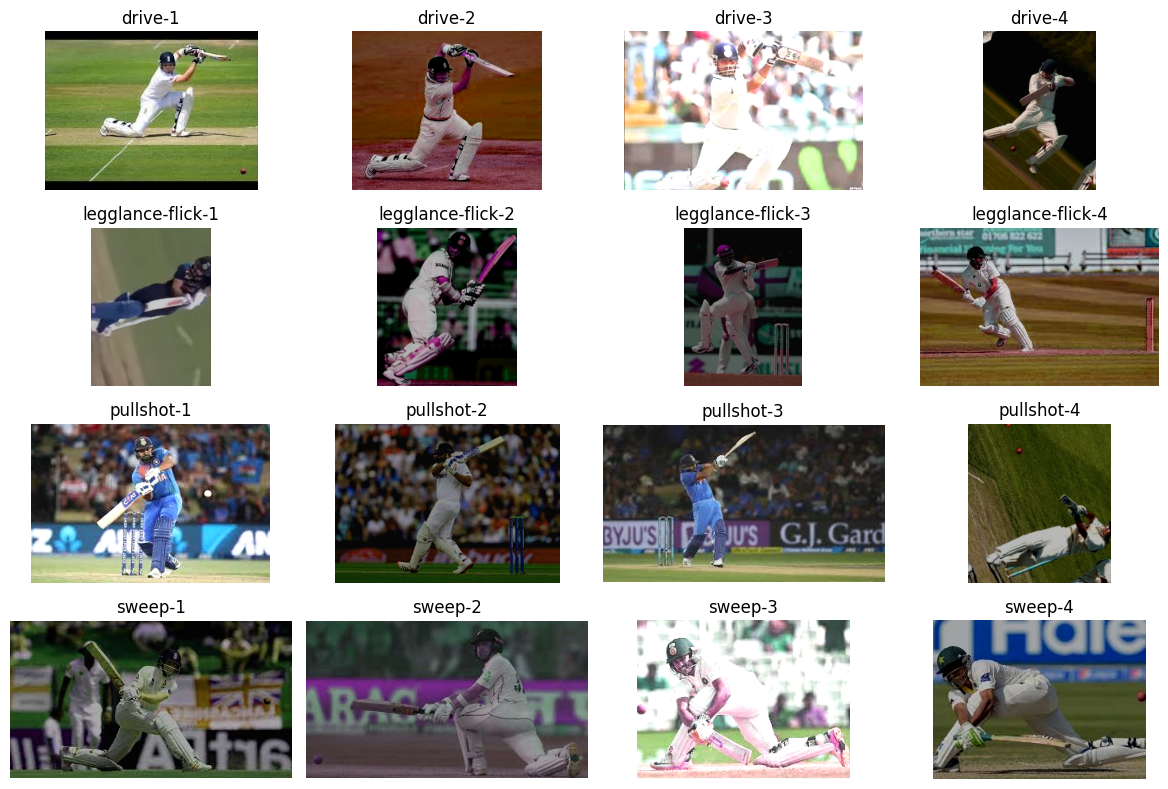

In [7]:
from PIL import Image

fig, axes = plt.subplots(len(shot_img_dict), 4, figsize=(12, 8))

for i, (shot, images) in enumerate(shot_img_dict.items()):
    for j, img_path in enumerate(images[:4]):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(f"{shot}-{j+1}")

plt.tight_layout()
plt.show()

In [8]:
import cv2
img  = cv2.imread(str(shot_img_dict['drive'][0]))
img.shape

(194, 259, 3)

In [9]:
img  = cv2.imread(str(shot_img_dict['drive'][1]))
img.shape

(206, 245, 3)

In [10]:
X , y = [] , []

for shot , images in shot_img_dict.items():
    
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img , (180,180))
        X.append(resized_img)
        y.append(shot_label_dict[shot])


In [11]:
len(X) , len(y)

(4724, 4724)

In [12]:
X[0].shape , X[1].shape

((180, 180, 3), (180, 180, 3))

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

In [15]:
len(X_train) , len(X_test) ,len(y_train) , len(y_test)

(3543, 1181, 3543, 1181)

In [16]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [17]:
num_classes = len(shot_label_dict)
num_classes

4

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,007,812 (41.99 MB)

 Trainable params: 11,007,812 (41.99 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 34s 226ms/step - accuracy: 0.2483 - loss: 1.4374 - val_accuracy: 0.2947 - val_loss: 1.3791
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3413 - loss: 1.3447 - val_accuracy: 0.3810 - val_loss: 1.3397
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4637 - loss: 1.2205 - val_accuracy: 0.4488 - val_loss: 1.2947
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5142 - loss: 1.1260 - val_accuracy: 0.4649 - val_loss: 1.2397
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6013 - loss: 0.9785 - val_accuracy: 0.5919 - val_loss: 1.0532
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6749 - loss: 0.8404 - val_accuracy: 0.6486 - val_loss: 0.8964
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7013 - loss: 0.7357 - val_accuracy: 0.7045 - val_loss: 0.7954
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7544 - loss: 0.6191 - val_ac

In [21]:
model.evaluate(X_test_scaled ,y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8993 - loss: 0.3133


[0.26542940735816956, 0.9102455377578735]

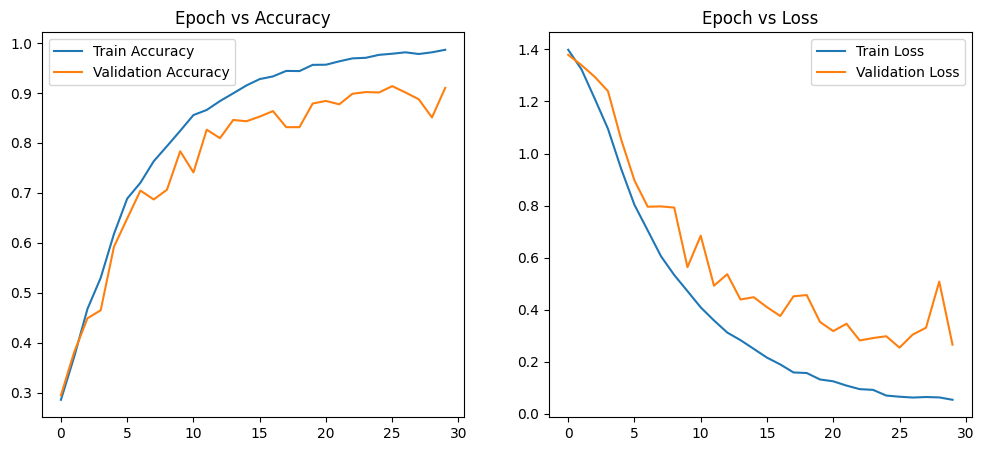

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Epoch vs Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Epoch vs Loss')
plt.show()

In [23]:
pred = model.predict(X_test_scaled)
pred[:5]

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[8.66596222e-01, 1.32518291e-01, 9.20374296e-05, 7.93490559e-04],
       [1.52515406e-06, 1.22573229e-09, 9.99998450e-01, 2.76744094e-09],
       [2.17432921e-06, 3.44171610e-07, 1.09398046e-10, 9.99997497e-01],
       [1.30578177e-03, 5.17719400e-06, 9.98616338e-01, 7.27149236e-05],
       [9.96380270e-01, 3.61515488e-03, 4.57310489e-06, 8.06394596e-09]],
      dtype=float32)

In [24]:
pred = [np.argmax(i) for i in pred]


In [25]:
pred[:20]

[0, 2, 3, 2, 0, 0, 0, 3, 1, 2, 3, 1, 2, 0, 0, 2, 3, 2, 1, 1]

In [26]:
list(y_test[:20])

[0, 2, 3, 2, 0, 0, 0, 3, 1, 2, 3, 1, 2, 3, 0, 2, 3, 2, 1, 1]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


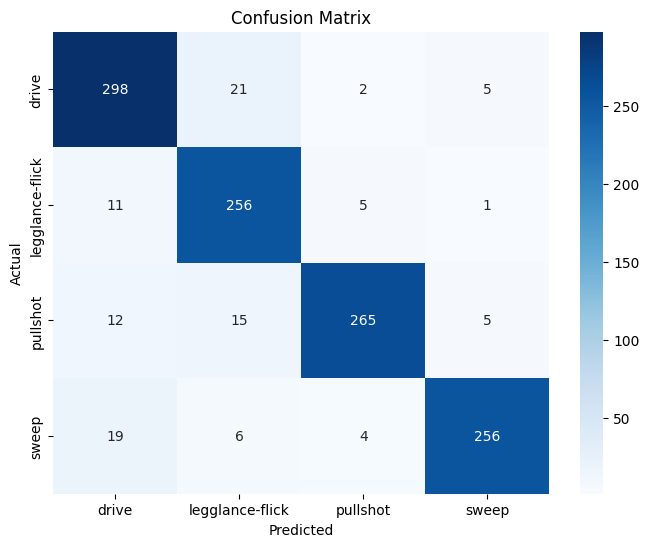

In [27]:
# Predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=shot_label_dict.keys(), yticklabels=shot_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=shot_label_dict.keys()))


                 precision    recall  f1-score   support

          drive       0.88      0.91      0.89       326
legglance-flick       0.86      0.94      0.90       273
       pullshot       0.96      0.89      0.92       297
          sweep       0.96      0.90      0.93       285

       accuracy                           0.91      1181
      macro avg       0.91      0.91      0.91      1181
   weighted avg       0.91      0.91      0.91      1181



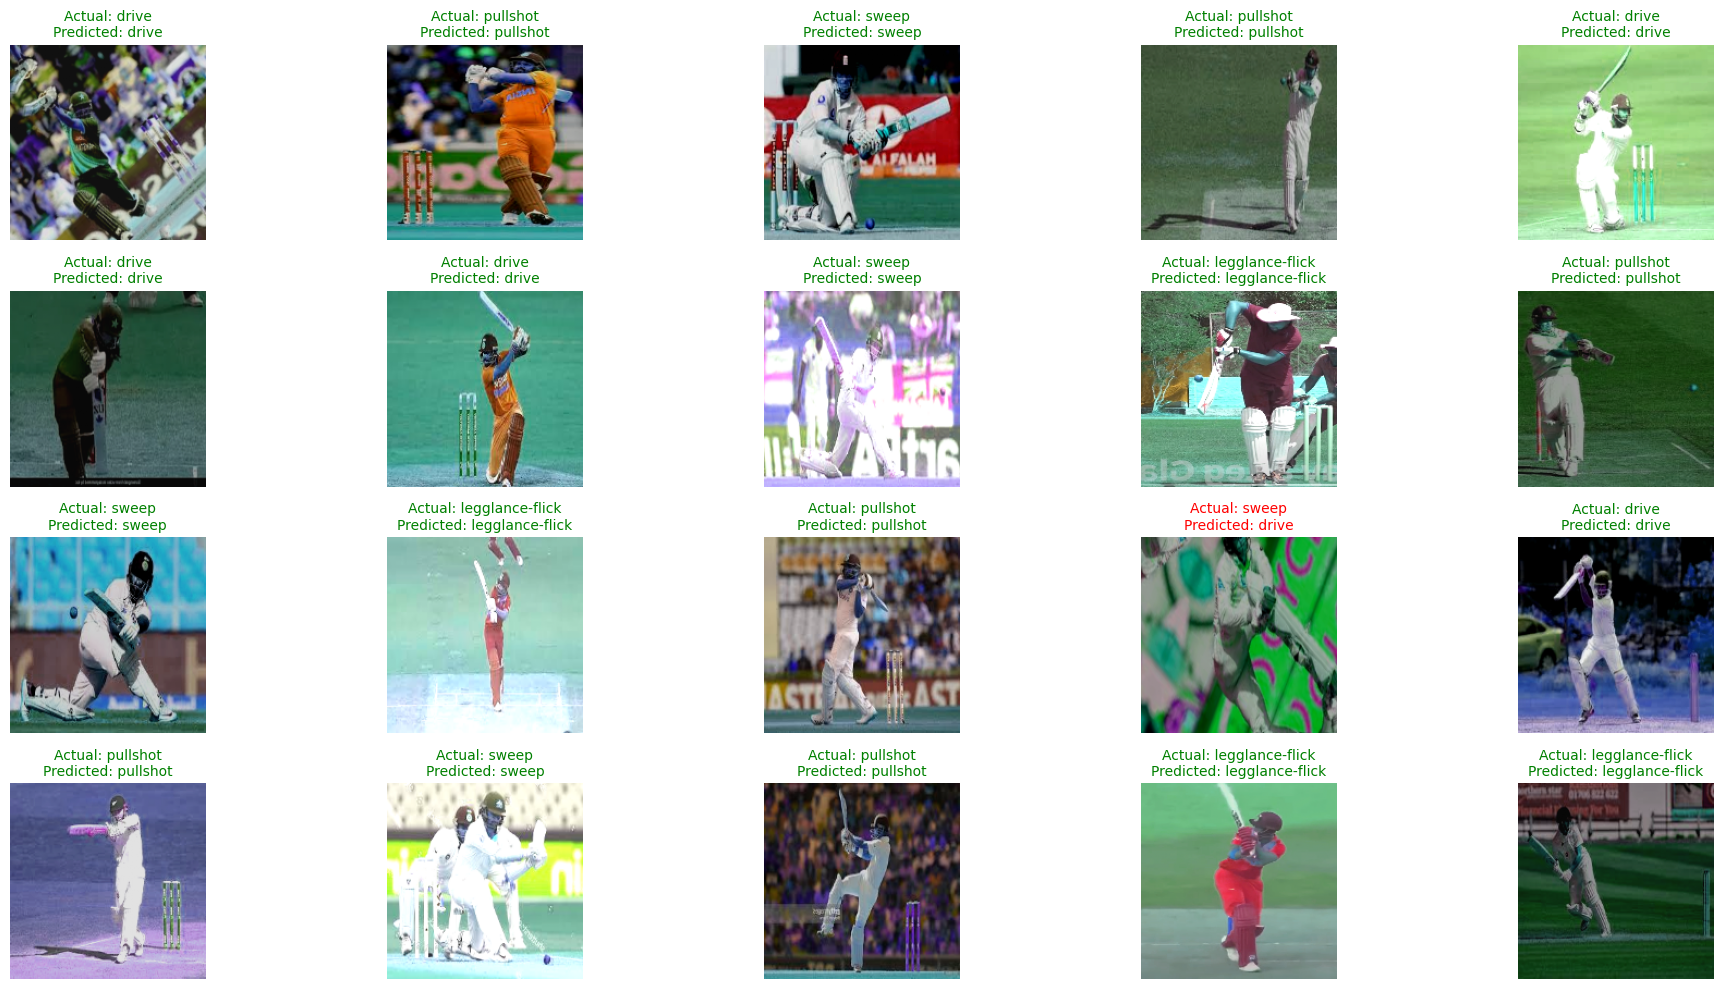

In [29]:
import matplotlib.pyplot as plt
import numpy as np

label_map = {0: 'drive', 1: 'legglance-flick', 2: 'pullshot', 3: 'sweep'}

num_images = 20

plt.figure(figsize=(20, 10))

for i in range(num_images):
    plt.subplot(4, 5, i + 1)  # 4 rows, 5 columns
    plt.imshow(X_test_scaled[i])  # Show the image
    actual_label = label_map[y_test[i]]
    predicted_label = label_map[pred[i]]
    
    # Set title with actual vs predicted labels
    title_color = 'green' if actual_label == predicted_label else 'red'
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", color=title_color, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [30]:
!pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 15.2 MB/s eta 0:00:00 0:00:01


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


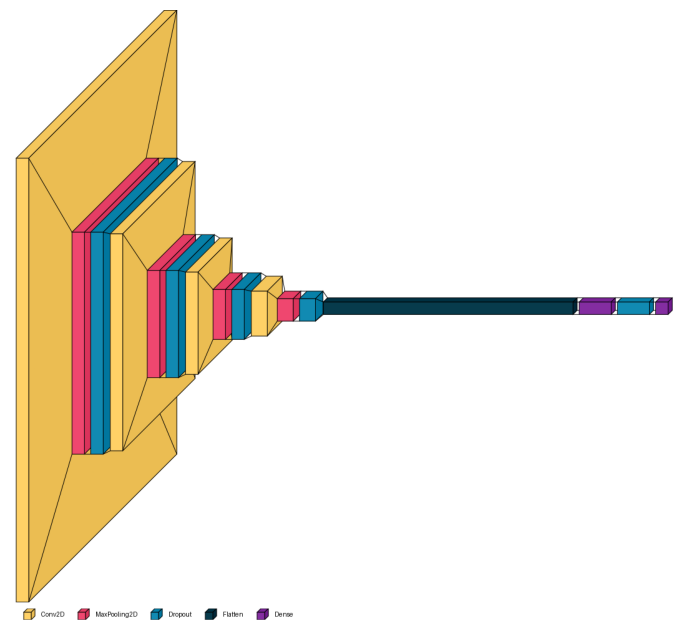

In [31]:
import visualkeras
from PIL import ImageFont

try:
    font = ImageFont.truetype("arial.ttf", 50)  # Adjust size as needed
except IOError:
    font = None #i#ncrease font size (adjust as needed)

# Generate the model visualization with larger legend text
img = visualkeras.layered_view(model, legend=True, font=font)

if img.mode == "RGBA":
    img = img.convert("RGB")

# Save the image
img.save("CNN_1.png")

# Display the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("CNN_1.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()
